### Bangla Fake News Detection

#### Md. Asifur Rahman
#### ID: 18.02.04.114

### Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_fake = pd.read_csv("Fake-1K.csv")
df_fake

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


In [ ]:
df_true = pd.read_csv("Authentic-48K.csv")
df_true

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
48673,61776,banglanews24.com,2018-10-11 16:39:23,Sports,"এনসিএলে তিতলির প্রভাব, সব ম্যাচ ড্র",প্রথমে বাংলাদেশের কাছ দিয়ে যাওয়ার কথা থাকলেও ঘ...,1
48674,61777,banglanews24.com,2018-10-11 16:39:27,International,"কর্ম-বসবাসে সেরা সিঙ্গাপুর, আয়ে সুইজারল্যান্ড",উন্নত জীবনযাপনের জন্য অনেকেই বিদেশে পাড়ি দেন। ...,1
48675,61778,banglanews24.com,2018-10-11 16:39:30,Politics,জয়পুরহাটে জামায়াতের ১৯ নেতাকর্মী আটক,জয়পুরহাট: সরকার বিরোধী গোপন বৈঠকের সময় জয়পুরহা...,1
48676,61779,banglanews24.com,2018-10-11 16:39:32,National,ভ্যানগার্ড পোশাক কারখানাকে জরিমানা,চট্টগ্রাম: পরিবেশ দূষণের দায়ে নগরের আগ্রাবাদ এ...,1


In [ ]:
df = pd.concat([df_fake, df_true])
df

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


In [2]:
df_fake = pd.read_csv("/content/drive/MyDrive/CSE 4214 (Pattern Recognition Lab)/Banfake/Fake-1K.csv")
df_true = pd.read_csv("/content/drive/MyDrive/CSE 4214 (Pattern Recognition Lab)/Banfake/Authentic-48K.csv")

In [4]:
df = pd.concat([df_fake, df_true])


In [21]:
content = df['content']
print(content.head())
print(type(content))

0    বাংলায় একটা প্রবাদ আছে  শেয়ালের কাছে মুরগী বর্...
1    BTV থেকে লোকজন আসছে  ইন্টারভিউ নিবে।চারজনের টি...
2    অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...
3    রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪ ৩...
4    নিজস্ব মতিবেদক‘মাদারফাকার নহে  আমি ব্রাদারফাকা...
Name: content, dtype: object
<class 'pandas.core.series.Series'>


In [22]:
content = content.values
print(type(content))

<class 'numpy.ndarray'>


In [23]:
content[0]

'বাংলায় একটা প্রবাদ আছে  শেয়ালের কাছে মুরগী বর্গা দেওয়া। প্রবাদটা এজন্য বলা হয় যে  শিয়ালের কাজই হলো মুরগী খেয়ে ফেলা। শেয়ালের কাছ থেকে মুরগী কখনো নিজেকে রক্ষা করতে পারেনা।তবে ফ্রান্সের এক বিশ্ববিদ্যালয়ের শিক্ষক শিক্ষার্থীরা জানাচ্ছে  এবার এক আশ্চর্য্যজনক ঘটনা ঘটছে। মুরগীর হামলায় শিয়াল মারা গেছে।ঘটনাটি গত সপ্তাহের  ফ্রান্সের উত্তর পূর্বাঞ্চলের বুতানিয়া এলাকার একটি কৃষিবিষয়ক বিদ্যালয়ে। ওই বিদ্যালয়ে একটি মুরগির খামার রয়েছে। মুরগির ঘরের এক কোনায় সকালে মৃত একটি শিয়াল পড়ে থাকতে দেখে শিক্ষার্থীরা।৬ হাজার মুরগি রয়েছে খামারটিতে। শিয়ালটির মৃতদেহ যেখানে পাওয়া গেছে  সেখানে তিন হাজার মুরগি ছিল। মুরগিগুলো সারা দিন বাইরে চরে বেড়ায়। সন্ধ্যা হলে নিজ থেকে ঘরে উঠে আসে। সূর্য ডুবে গেলেই দরজা বন্ধ হয়ে যায় স্বয়ংক্রিয়ভাবে।স্থানীয় বন্য প্রাণী বিশেষজ্ঞরা জানিয়েছেন  এই ঘটনায় তাঁরা অবাক। শিয়ালটি বাচ্চা ও অনভিজ্ঞ ছিল। এতগুলো মুরগির সামনে পড়ে সে সম্ভবত ভড়কে গিয়েছিল।Source  BBC Bangla'

In [7]:
headline = df['headline']
print(headline.head())
print(type(headline))

0                             মুরগির হামলায় শেয়াল নিহত
1              বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম
2    বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...
3                        অবসর নেয়ার ঘোষণা দিলেন মেসি !
4    মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...
Name: headline, dtype: object
<class 'pandas.core.series.Series'>


In [8]:
headline = headline.values
print(type(content))

<class 'numpy.ndarray'>


Average length of contents: 1812.343


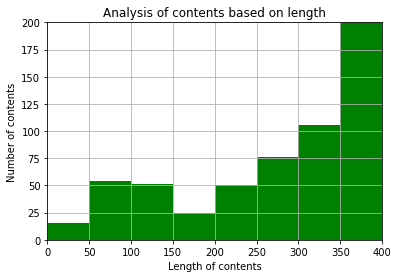

In [9]:
x = [len(str(content[i])) for i in range(content.shape[0])]
print('Average length of contents: {:.3f}'.format(np.mean(x)))
bins = [1, 50, 100, 150, 200, 250, 300, 350, 400]
plt.hist(x, bins = bins, color = 'g')
plt.xlabel('Length of contents')
plt.ylabel('Number of contents')
plt.title('Analysis of contents based on length')
plt.axis([0, 400, 0, 200])
plt.grid(True)
plt.show()

In [20]:
# x = [str(content[i]) for i in range(len(content))]
content[0].values

AttributeError: ignored

In [ ]:
df['category'].unique()

array(['Education', 'National', 'Crime', 'Entertainment', 'Finance',
       'International', 'Sports', 'Miscellaneous', 'Politics',
       'Lifestyle', 'Technology', 'Editorial'], dtype=object)

### Punctuation to White Space

In [10]:
import string
punctuation_edit = string.punctuation.replace('\'','') + '0123456789'
print(punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


### Bangla stopwords

In [11]:
import requests
url = 'https://github.com/stopwords-iso/stopwords-bn/blob/master/stopwords-bn.txt'
read_data = requests.get(url).content
type(read_data)

bytes

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
with open('all_bangla_stop_words.txt', 'r', encoding='utf8') as bn:
    stop_words = [line.strip() for line in bn]

print(type(stop_words))
print(len(stop_words))
print(stop_words)

<class 'list'>
398
['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'ক

### Punctuation Removal

In [24]:
for i in range(len(content)):
    content[i] = str(content[i]).translate(trantab)
print(type(content))

<class 'numpy.ndarray'>


In [25]:
for i in range(len(headline)):
    headline[i] = str(headline[i]).translate(trantab)
print(type(headline))

<class 'numpy.ndarray'>


In [ ]:
df.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত ৬ জনকে শোকজ,গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [ ]:
df.head()

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত ৬ জনকে শোকজ,গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(stop_words=stop_words)
tf = count_vector.fit_transform(content).toarray()
print(type(tf))
print(tf.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অথব', 'অন', 'অবধ', 'অবশ', 'অর', 'আগ', 'আছ', 'আদ', 'আপন', 'আব', 'আম', 'আমর', 'ইত', 'ইহ', 'উই', 'উক', 'উচ', 'উত', 'উন', 'এক', 'একট', 'একব', 'এখ', 'এট', 'এতট', 'এদ', 'এমনক', 'ওক', 'ওখ', 'ওদ', 'ওয', 'ওয়', 'কট', 'কব', 'কমন', 'কয', 'কর', 'করছ', 'করত', 'করব', 'করল', 'কয়', 'খত', 'চল', 'জনক', 'তথ', 'তব', 'তর', 'থম', 'ধর', 'নঐ', 'নও', 'নজন', 'নত', 'নয', 'পক', 'পষ', 'ফল', 'বক', 'বদল', 'বয', 'বর', 'বল', 'বলত', 'বস', 'বহ', 'মত', 'মধ', 'মন', 'যওজ', 'যতট', 'যথ', 'যদ', 'যন', 'যবহ', 'যভ', 'যম', 'রও', 'রণ', 'রত', 'রথম', 'রপর', 'রভ', 'রয', 'রযন', 'লক', 'ষয', 'সঙ', 'সম', 'সমস', 'হইত', 'হইব', 'হইয', 'হওয', 'হচ', 'হব', 'হয'] not in stop_words.
  warnings.warn(


<class 'numpy.ndarray'>
(49977, 27800)


In [18]:
content[1]

'BTV থেকে লোকজন আসছে  ইন্টারভিউ নিবে।চারজনের টিম  এদের মধ্যে স্যুট  টাই পড়া বস একজন  দুইজন ক্যামেরাম্যান  আরেকজন উঠতি বয়সের  কড়া মেকাপ দেওয়া নারী মডেল।বস যিনি  আমার সাথে হাত মিলিয়ে পরিচয় হবার পর  পাশে দাঁড়ানো এক সিকিউরিটি গার্ডকে বললেন  ‘    তুমি এক কাজ করো  নুরুল ভাই কফির কাপ হাতে নিয়ে তোমার সামনে দিয়ে হেঁটে যাবে  তুমি আকাশ বাতাস কাঁপাইয়া ঠাস করে একটা সেলুট দিবা  এইটা ভিডিও করে রাখি  বাঙ্গালি পাবলিকের ভুং ভাং পছন্দ’।‘    এইটা না করলে হয় না  কেমন যেনো বানানো লাগে’– ভদ্রলোকের আইডিয়া শুনে আমি রীতিমতো বিব্রত।‘    আরে স্যার কী বলেন  আপনার ফ্যাক্টরিতে আদব কায়দা আছে  এইটা তোফায়েল সাহেব দেখতে চাইবে’।‘    তোফায়েল সাহেব কে ’‘কমার্স মিনিস্টার তোফায়েল সাহেব। নেন– কফির কাপে চুমুক দিতে দিতে হাঁটা শুরু করেন’।হাঁটাহাঁটি ভিডিও হবার পর  আমার অফিস রুমে বসে ইন্টারভিউ শুরু হলো।‘স্যার  ক্যামেরা অন হবার পর আপনি বলা শুরু করবেন’।‘কী বলবো ’‘বাংলাদেশের আর্থ সামাজিক প্রেক্ষাপটে হোম টেক্সটাইলসের অবদান আর তাতে ইউনিলায়েন্স টেক্সটাইলসের ভুমিকা’।আমি কিছুক্ষণ তবদা মেরে থাকলাম। ‘যেই লাইন বললেন  এইটার বাংলা কী ’‘এইটাই ব

In [ ]:

st = tokens_without_sw[0] + tokens_without_sw[1]
st

In [39]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# text = "Nick likes to play football, however he is not too fond of tennis."
ishan = ""
for i in range(10):
  text_tokens = word_tokenize((content[i]))
  tokens_without_sw = [word for word in text_tokens if not word in stop_words]
  string = ""
  for j in range(len(tokens_without_sw)):
    string += tokens_without_sw[j]

    string = string + " "
  ishan += string + "\n"
    
  # print(string)
print(ishan)

  # print(tokens_without_sw)
# text_tokens = word_tokenize('হট্টগোল করায় বাকৃবিতে অথবা দুইজন বরখাস্ত ৬ জনকে শোকজ')


বাংলায় একটা প্রবাদ শেয়ালের মুরগী বর্গা দেওয়া। প্রবাদটা এজন্য শিয়ালের কাজই মুরগী খেয়ে ফেলা। শেয়ালের মুরগী কখনো নিজেকে রক্ষা পারেনা।তবে ফ্রান্সের এক বিশ্ববিদ্যালয়ের শিক্ষক শিক্ষার্থীরা জানাচ্ছে এক আশ্চর্য্যজনক ঘটনা ঘটছে। মুরগীর হামলায় শিয়াল মারা গেছে।ঘটনাটি গত সপ্তাহের ফ্রান্সের পূর্বাঞ্চলের বুতানিয়া এলাকার কৃষিবিষয়ক বিদ্যালয়ে। বিদ্যালয়ে মুরগির খামার রয়েছে। মুরগির ঘরের এক কোনায় সকালে মৃত শিয়াল পড়ে থাকতে শিক্ষার্থীরা।৬ মুরগি রয়েছে খামারটিতে। শিয়ালটির মৃতদেহ পাওয়া তিন মুরগি ছিল। মুরগিগুলো সারা বাইরে চরে বেড়ায়। সন্ধ্যা নিজ ঘরে উঠে আসে। সূর্য ডুবে গেলেই দরজা বন্ধ হয়ে যায় স্বয়ংক্রিয়ভাবে।স্থানীয় বন্য প্রাণী বিশেষজ্ঞরা জানিয়েছেন ঘটনায় অবাক। শিয়ালটি বাচ্চা অনভিজ্ঞ ছিল। এতগুলো মুরগির পড়ে সম্ভবত ভড়কে গিয়েছিল।Source BBC Bangla 
BTV লোকজন আসছে ইন্টারভিউ নিবে।চারজনের টিম স্যুট টাই পড়া বস একজন দুইজন ক্যামেরাম্যান আরেকজন উঠতি বয়সের কড়া মেকাপ নারী মডেল।বস সাথে হাত মিলিয়ে পরিচয় হবার পাশে দাঁড়ানো এক সিকিউরিটি গার্ডকে ‘ এক করো নুরুল ভাই কফির কাপ হাতে দিয়ে হেঁটে আকাশ বাতাস কাঁপাইয়া ঠাস একটা সেলুট দিবা এইটা 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
for i in :


**Explotory Data Analysis - **


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_fake = pd.read_csv("/content/drive/MyDrive/CSE 4214 (Pattern Recognition Lab)/Banfake/Fake-1K.csv")
df_true = pd.read_csv("/content/drive/MyDrive/CSE 4214 (Pattern Recognition Lab)/Banfake/Authentic-48K.csv")


In [5]:
df_true

,articleID,domain,date,category,headline,content,label
0,1,jagonews24.com,2018-09-19 17:48:18,Education,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,1
1,2,jagonews24.com,2018-09-19 17:48:19,National,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,1
2,3,jagonews24.com,2018-09-19 17:48:20,National,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,1
3,4,jagonews24.com,2018-09-19 17:48:21,Crime,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,1
4,5,jagonews24.com,2018-09-19 17:48:21,National,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,1
...,...,...,...,...,...,...,...
48673,61776,banglanews24.com,2018-10-11 16:39:23,Sports,"এনসিএলে তিতলির প্রভাব, সব ম্যাচ ড্র",প্রথমে বাংলাদেশের কাছ দিয়ে যাওয়ার কথা থাকলেও ঘ...,1
48674,61777,banglanews24.com,2018-10-11 16:39:27,International,"কর্ম-বসবাসে সেরা সিঙ্গাপুর, আয়ে সুইজারল্যান্ড",উন্নত জীবনযাপনের জন্য অনেকেই বিদেশে পাড়ি দেন। ...,1
48675,61778,banglanews24.com,2018-10-11 16:39:30,Politics,জয়পুরহাটে জামায়াতের ১৯ নেতাকর্মী আটক,জয়পুরহাট: সরকার বিরোধী গোপন বৈঠকের সময় জয়পুরহা...,1
48676,61779,banglanews24.com,2018-10-11 16:39:32,National,ভ্যানগার্ড পোশাক কারখানাকে জরিমানা,চট্টগ্রাম: পরিবেশ দূষণের দায়ে নগরের আগ্রাবাদ এ...,1


In [6]:
df_fake

,articleID,domain,date,category,headline,content,label
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0
...,...,...,...,...,...,...,...
1294,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0
1295,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0
1296,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0
1297,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0


In [ ]:
import matplotlib.pyplot as plt

def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column[:top].plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()


import seaborn as sns

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.distplot(column)
  plt.show()

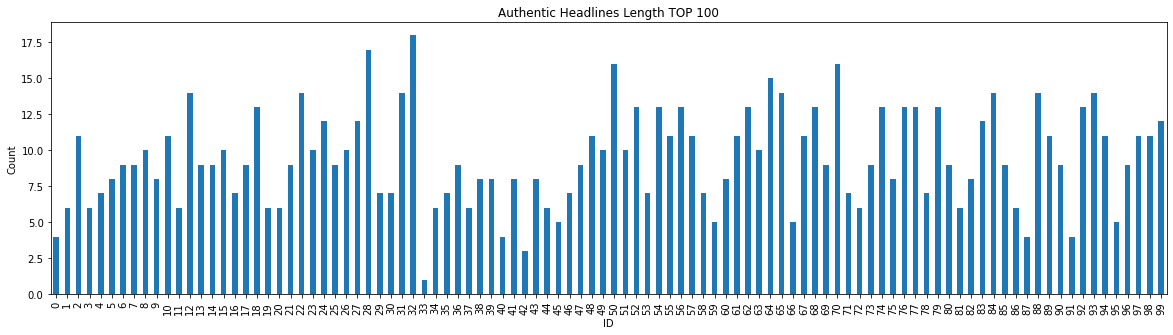

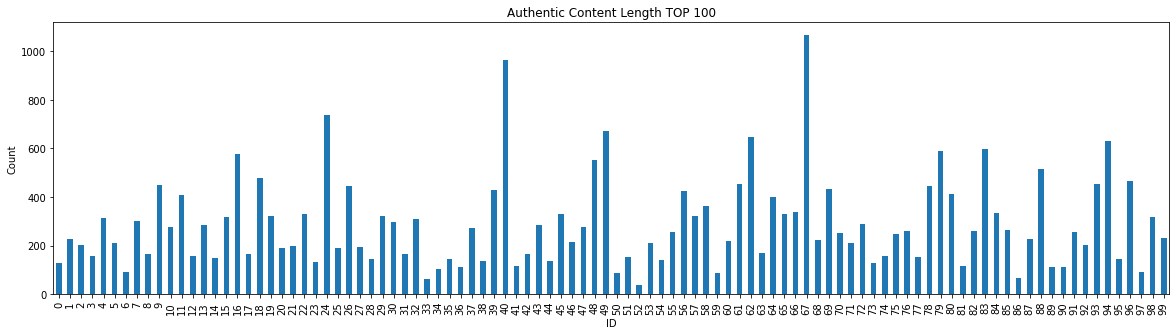

In [ ]:
df_true['head_lenght'] = df_true.headline.apply(lambda x : len(x.split()))
df_true['content_head_lenght'] = df_true.content.apply(lambda x : len(x.split()))


show_bar(df_true.head_lenght, "Authentic Headlines Length TOP 100")
print("")
show_bar(df_true.content_head_lenght, "Authentic Content Length TOP 100")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


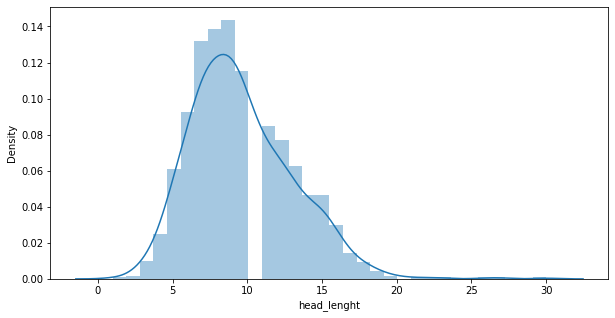

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


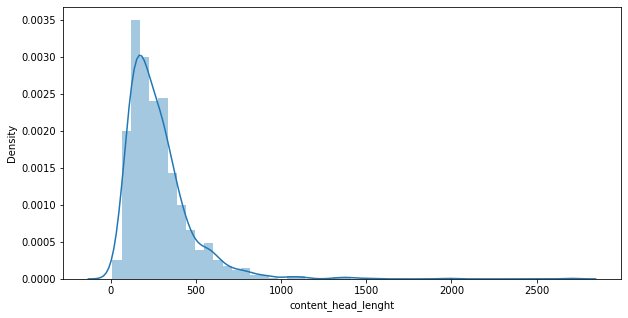

In [ ]:
show_dist(df_true.head_lenght)
print("")
show_dist(df_true.content_head_lenght)

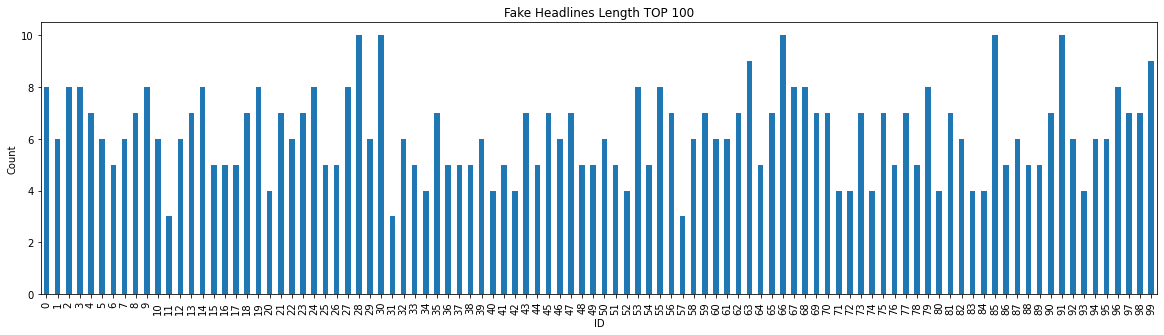

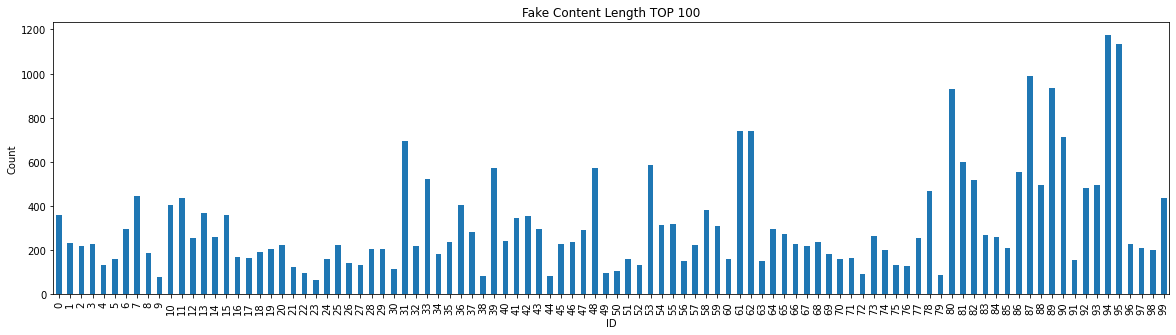

In [ ]:
df_fake['head_lenght'] = df_fake.headline.apply(lambda x : len(x.split()))
df_fake['content_head_lenght'] = df_fake.content.apply(lambda x : len(x.split()))

show_bar(df_fake.head_lenght, "Fake Headlines Length TOP 100")
print("")
show_bar(df_fake.content_head_lenght, "Fake Content Length TOP 100")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


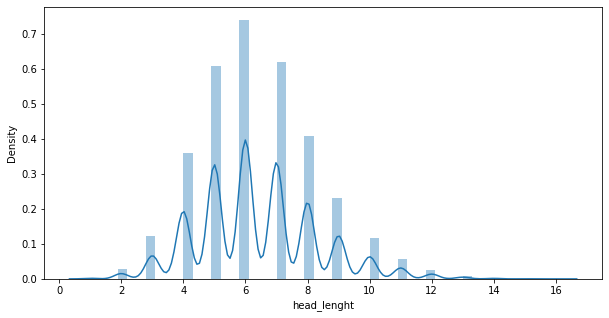

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


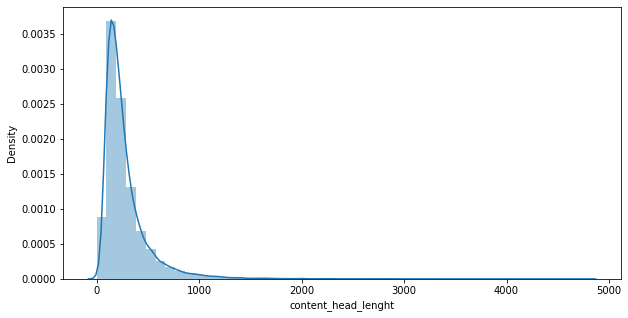

In [ ]:
show_dist(df_fake.head_lenght)
print("")
show_dist(df_fake.content_head_lenght)

**Word Cloud**

In [ ]:
!wget https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip

--2023-01-06 14:59:16--  https://www.easynepalityping.com/resource/font/bangla/06-nikosh-bangla-font.zip
Resolving www.easynepalityping.com (www.easynepalityping.com)... 104.21.11.66, 172.67.165.83, 2606:4700:3035::ac43:a553, ...
Connecting to www.easynepalityping.com (www.easynepalityping.com)|104.21.11.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317905 (310K) [application/zip]
Saving to: ‘06-nikosh-bangla-font.zip’

06-nikosh-bangla-fo 100%[===================>] 310.45K  --.-KB/s    in 0.04s   

2023-01-06 14:59:16 (8.54 MB/s) - ‘06-nikosh-bangla-font.zip’ saved [317905/317905]



In [ ]:
!unzip 06-nikosh-bangla-font.zip

Archive:  06-nikosh-bangla-font.zip
  inflating: Nikosh.ttf              


In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_world(text):

    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='black', 
                    font_path="Nikosh.ttf",
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (5, 5), facecolor = 'r', edgecolor = 'r' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

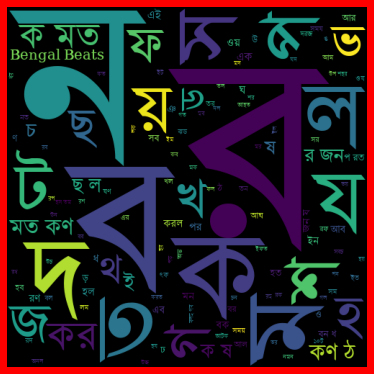

In [ ]:
s= " ".join(df_true.headline[:100])
plot_world(s)

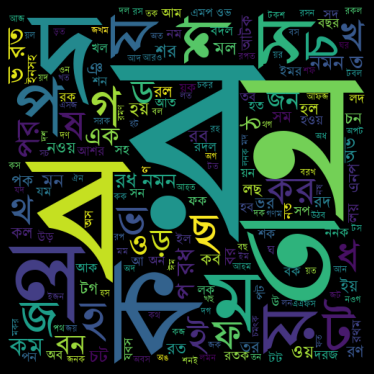

In [ ]:
s= " ".join(df_fake.headline[:100])
plot_world(s)

**Analysis Words**

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()

s = """আমি বাংলায় গান গাই
    আমি বাংলার গান গাই।
    আমি আমার আমিকে চিরদিন
    এই বাংলায় খুঁজে পাই।"""

print(tokenizer.tokenize(s))

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['আমি', 'বাংলায়', 'গান', 'গাই', 'আমি', 'বাংলার', 'গান', 'গাই', '।', 'আমি', 'আমার', 'আমিকে', 'চিরদিন', 'এই', 'বাংলায়', 'খুঁজে', 'পাই', '।']


/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
def create_corpus(texts):
    corpus=[]

    for txt in texts:
      tokens = tokenizer.tokenize(txt)
      corpus.extend(tokens)

    return corpus

In [ ]:
true_corpus = create_corpus(df_true.headline[:1000])
print("Total true tokens in 1000", len(true_corpus))

fake_corpus = create_corpus(df_fake.headline[:1000])
print("Total fake tokens in 1000", len(fake_corpus))

Total true tokens in 1000 10525
Total fake tokens in 1000 7482


In [ ]:
from matplotlib import font_manager
# set font
font_manager.fontManager.addfont("Nikosh.ttf")
plt.rcParams['font.family'] = 'Nikosh'
plt.rcParams['font.sans-serif']=['Nikosh']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
from collections import defaultdict
from collections import  Counter
from bnlp.corpus import stopwords
import matplotlib.font_manager as fm

def show_stop_words(corpus, length=20):
  dic = defaultdict(int)

  for word in corpus:
      if word in stopwords:
          dic[word]+=1

  top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
  x,y=zip(*top)
  print(x)
  print(y)
  plt.figure(figsize=(10,5))
  plt.bar(x,y)
  plt.show()

('না', 'যে', 'করে', 'ও', 'থেকে', 'নিয়ে', 'এই', 'জন্য', 'দিলেন', 'করলেন', 'এবার', 'করতে', 'কি', 'করা', 'বেশি', 'হবে', 'দুই', 'যা', 'পর', 'আমার')
(101, 58, 53, 40, 36, 36, 36, 28, 26, 25, 25, 25, 25, 22, 20, 20, 20, 18, 17, 17)


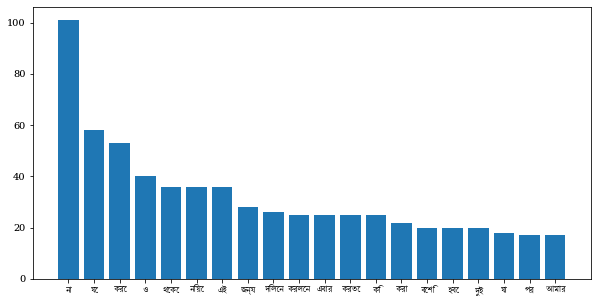

In [ ]:
show_stop_words(true_corpus)

('না', 'ও', 'শুরু', 'হবে', 'করে', 'নিয়ে', 'জন্য', 'থেকে', 'দুই', 'নতুন', 'সঙ্গে', 'কোটি', 'করা', 'করতে', 'হচ্ছে', 'দিতে', 'পর', 'প্রথম', 'কাজ', 'হাজার')
(57, 34, 23, 23, 23, 22, 21, 21, 19, 17, 17, 16, 16, 14, 14, 11, 11, 11, 11, 11)


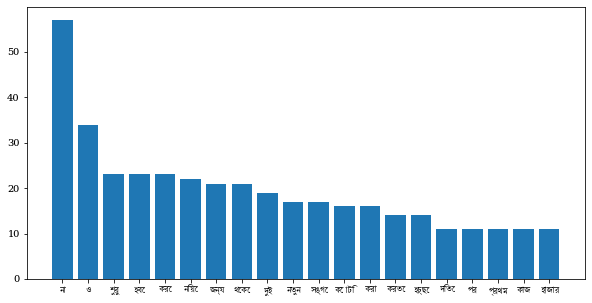

In [ ]:
show_stop_words(fake_corpus)

In [ ]:
from bnlp.corpus import stopwords, punctuations, digits

def filters(corpus):
  res = []
  for i in corpus:
    if i in stopwords:
      continue

    if i in punctuations + '‘' + '’':
      continue

    if i in digits:
      continue

    res.append(i)

  return res

In [ ]:
true_corpus_filtered = filters(true_corpus)
fake_corpus_filtered = filters(fake_corpus)

In [ ]:
def get_top_words(corpus):
  dic = defaultdict(int)

  for word in corpus:
      dic[word] +=1

  top = sorted(dic.items(), key=lambda x:x[1],reverse=True)
  x,y=zip(*top)
  return x, y

In [ ]:
x, y = get_top_words(true_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('দৈনিক', 'মতিকণ্ঠ', 'Bengal', 'Beats', 'এক', 'হয়ে', 'সাথে', 'দিয়ে', 'কারণে', 'শেখ')
(151, 151, 139, 139, 41, 29, 24, 21, 20, 19)


In [ ]:
x, y = get_top_words(fake_corpus_filtered)

print("Top 10 words")
print(x[:10])
print(y[:10])

Top 10 words
('১৯', 'সেপ্টেম্বর', '২০১৮', 'প্রধানমন্ত্রী', 'পাকিস্তান', 'লাখ', 'ভারত', 'আটক', 'বাংলাদেশ', 'উদ্ধার')
(56, 52, 51, 45, 33, 25, 23, 21, 20, 20)
